# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub

- Name: Junhui Fan
- GitHub Username: TheGOATffffffff

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
#Imports
# Imports - these are all the imports needed for the assignment
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import nltk package 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Vectorizer, which transforms text data into bag-of-words feature
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [2]:
#Read Data
df_park = pd.read_csv('yelp_SD_reviews.csv')
df_park_review = pd.read_csv('yelp_SD_parks.csv')
df_CA_envir_hlth = pd.read_csv('calenviroscreen-final-report.csv')

In [3]:
df_park_review.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [4]:
df_CA_envir_hlth = df_CA_envir_hlth.drop(columns = ['Age', 'Age Pctl', 'Asthma', 'Asthma Pctl', 
                                 'Low Birth Weight','Low Birth Weight Pctl', 'Education', 'Education Pctl',
                                 'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty',
                                 'Poverty Pctl', 'Unemployment', 'Unemployment Pctl', 'Pop. Char. ',
                                 'Pop. Char. Score', 'Pop. Char. Pctl','Total Population', 
                                'Click for interactive map', 'Hyperlink', 'CES 2.0 Percentile Range', 
                                'Ozone Pctl', 'Diesel PM Pctl','Drinking Water Pctl', 'Pesticides Pctl',
                                'Tox. Release Pctl','Traffic', 'Traffic Pctl', 'Cleanup Sites Pctl', 
                                'Groundwater Threats Pctl','Haz. Waste Pctl', 'Imp. Water Bodies Pctl', 
                                'Solid Waste Pctl', 'Pollution Burden','Pollution Burden Pctl'])

In [5]:
df_CA_envir_hlth.columns

Index(['Census Tract', 'California County', 'CES 2.0 Score', 'Ozone', 'PM2.5',
       'PM2.5 Pctl', 'Diesel PM', 'Drinking Water', 'Pesticides',
       'Tox. Release', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste',
       'Imp. Water Bodies', 'Solid Waste', 'Pollution Burden Score',
       'Location 1'],
      dtype='object')

# Data Cleaning

Describe your data cleaning steps here.

In [6]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

#rename variables in df_park
df_park.rename(columns={'id': 'name', 'rating': 'personal_rating', 'text':'comment'}, inplace=True)
df_park.head()

,name,personal_rating,comment
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


In [27]:
df_park_review.head()
df_park_review['review_count'].min()

1

In [7]:
#rename variables in df_park_review
df_park_review.rename(columns = {'rating': 'avg_rating'},inplace=True)
#drop variables in df_park_review which I will not analyze
df_park_review = df_park_review.drop(columns = ['phone', 'url', 'longitude', 'latitude', 'is_closed', 'id'])

In [8]:
#merge park names and park reviews
df_park_and_review = pd.merge(df_park, df_park_review, on = 'name')
df_park_and_review = df_park_and_review[['name', 'avg_rating', 'personal_rating', 'comment', 'review_count', 'address']]
df_park_and_review.head()

,name,avg_rating,personal_rating,comment,review_count,address
0,Balboa Park,5.0,5,Balboa Park is a must see when coming to San D...,2105,"1549 El Prado San Diego, CA 92101"
1,Balboa Park,5.0,5,Beautiful grounds even to take a stroll during...,2105,"1549 El Prado San Diego, CA 92101"
2,Balboa Park,5.0,5,Beautiful sightseeing in San Diego. Lots of wa...,2105,"1549 El Prado San Diego, CA 92101"
3,Civita Park,4.5,5,Was invited to child's B-Day party pre Covid-1...,46,"7960 Civita Blvd San Diego, CA 92108"
4,Civita Park,4.5,5,"Pretty nice park, beautiful design. Anyone is...",46,"7960 Civita Blvd San Diego, CA 92108"


In [9]:
#Check is there is missing value
df_park_and_review.isnull().sum()

name               0
avg_rating         0
personal_rating    0
comment            0
review_count       0
address            0
dtype: int64

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Text(0, 0.5, 'park rating')

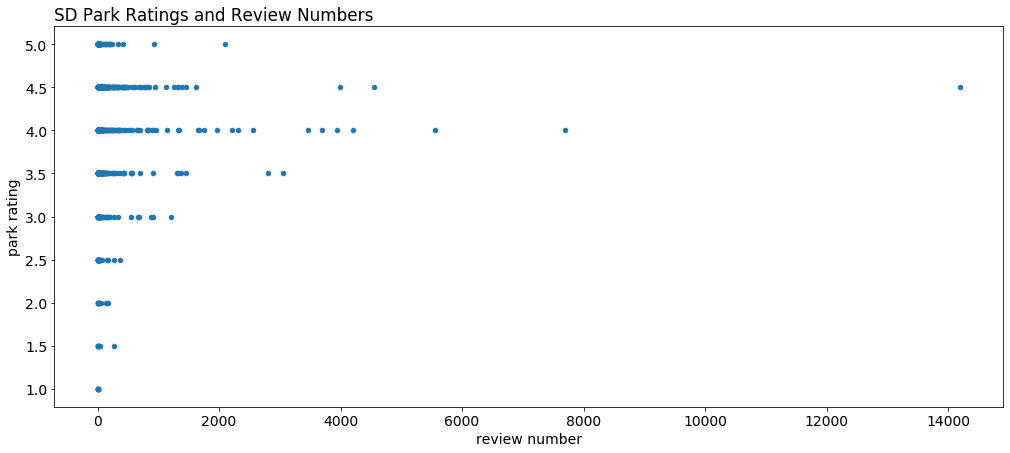

In [35]:
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})
df_park_review.plot.scatter(x = 'review_count', y = 'avg_rating')
plt.title('SD Park Ratings and Review Numbers', loc='left')
plt.xlabel('review number')
plt.ylabel('park rating')

In [10]:
df_park_and_review['comment'] = df_park_and_review['comment'].str.lower()
print(df_park_and_review['comment'])

0       balboa park is a must see when coming to san d...
1       beautiful grounds even to take a stroll during...
2       beautiful sightseeing in san diego. lots of wa...
3       was invited to child's b-day party pre covid-1...
4       pretty nice park, beautiful design.  anyone is...
                              ...                        
2414    i have visited over 27 mlb ballparks including...
2415    no grass here but it's a great dog park. if yo...
2416    i love taking our cholate lab here, however, t...
2417    pretty small dog park overall. the center of t...
2418    super friendly staff! i always feel welcome an...
Name: comment, Length: 2419, dtype: object


In [11]:
#tokenize the review
df_park_and_review['review_token'] = df_park_and_review['comment'].apply(word_tokenize) 

print(df_park_and_review.loc[20,'review_token'])

['this', 'is', 'occasionally', 'one', 'of', 'my', 'favorite', 'places', 'to', 'go', '.', 'and', 'other', 'times', 'it', "'s", 'so', 'filled', 'with', 'homeless', 'people', 'and', 'riffraff', 'that', 'it', "'s", 'unsafe', 'to', 'explore', 'and', 'you', '...']


In [12]:
#remove stop words
stop_words = set(stopwords.words('english'))
df_park_and_review['review_stop'] = df_park_and_review['review_token'].apply(lambda x: [item for item in x if item not in stop_words])
print(df_park_and_review.loc[20,'review_stop'])

['occasionally', 'one', 'favorite', 'places', 'go', '.', 'times', "'s", 'filled', 'homeless', 'people', 'riffraff', "'s", 'unsafe', 'explore', '...']


In [13]:
print(stop_words)

{'should', 'no', 'i', 'such', 'few', 'doing', 'has', "wasn't", 'now', 's', 'out', 'through', 'm', 'y', 'why', 'having', 'did', 'ours', 'nor', 'wouldn', 'ain', "didn't", 'shan', 'before', 'than', 'by', "weren't", 'his', 'yourselves', "should've", "couldn't", 'between', 'other', 'aren', 'ma', 'most', 'hers', "mustn't", "you're", 'into', "hadn't", 'she', 'being', 'you', 'again', 'then', 'will', 'this', 'more', 'where', 'some', 'was', 'against', 'with', 'does', 'wasn', 'our', 'haven', 'and', 'until', 'same', "haven't", 'once', 'hasn', 'up', "don't", 'herself', 'own', 'that', 'shouldn', 'after', 'here', 'd', 'under', 'ourselves', 'your', 'an', 'very', 'how', 'as', 'mustn', 'what', 'hadn', "hasn't", 'isn', 'yours', 'didn', 'all', 'were', 'be', 'during', 'these', "aren't", 'those', 'or', 'doesn', 'me', 'them', 'not', 'any', 'are', 'from', 'theirs', 'below', 'they', 'who', 'him', 'my', 'just', 'do', 'which', "isn't", 'themselves', 'there', 'over', 'he', 'their', 'for', 'so', 'don', "won't", 'b

In [14]:
list_of_unrelevant_words = ['...', 'park', "'s", "n't", "'ve", 'time', 'get']
df_park_and_review['review_stop'] = df_park_and_review['review_stop'].apply(lambda x: [item for item in x if item not in list_of_unrelevant_words])

In [15]:
#stemming the review
from nltk.stem import PorterStemmer

ps = PorterStemmer()

df_park_and_review['review_stem'] = df_park_and_review['review_stop'].apply(lambda x: [ps.stem(y) for y in x])
df_park_and_review['review_stem']

0       [balboa, must, see, come, san, diego, ., resid...
1       [beauti, ground, even, take, stroll, covid, gr...
2       [beauti, sightse, san, diego, ., lot, walkway,...
3       [invit, child, b-day, parti, pre, covid-19, .,...
4       [pretti, nice, ,, beauti, design, ., anyon, we...
                              ...                        
2414    [visit, 27, mlb, ballpark, includ, old, jack, ...
2415    [grass, great, dog, ., white, dog, know, 'll, ...
2416    [love, take, cholat, lab, ,, howev, ,, mulch, ...
2417    [pretti, small, dog, overal, ., center, bit, c...
2418    [super, friendli, staff, !, alway, feel, welco...
Name: review_stem, Length: 2419, dtype: object

In [16]:
# get series of all words in comment after stemming
comment_ready = df_park_and_review['review_stem'].apply(pd.Series).stack()

0     0        balboa
      1          must
      2           see
      3          come
      4           san
              ...    
2418  12       highli
      13    recommend
      14    fairbrook
      15         farm
      16            !
Length: 41206, dtype: object


In [17]:
from nltk.probability import FreqDist
import string

# calculation word frequency
comment_ready_freq = FreqDist(comment_ready)
# remove punctuation counts
for punc in string.punctuation:
    del comment_ready_freq[punc]

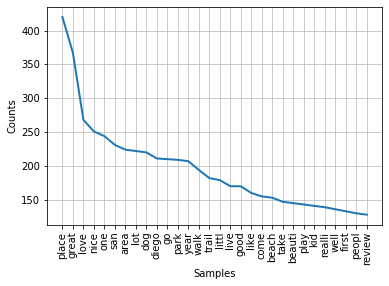

In [18]:
# Frequency Distribution Plot - top 20 for words in what students like most
comment_ready_freq.plot(30, cumulative=False)

In [19]:
list_of_unrelevant_words = ['...', 'I', 'park', 'the', 'place', 'it', 'my']
empty = ''
def delete_unrelevant_words(string):
    for i in string:
        if i in list_of_unrelevant_words:
            i = empty

In [20]:
ffff = ['as', 'my', 'dog']
delete_unrelevant_words(ffff)
ffff

['as', 'my', 'dog']

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*